In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as  plt

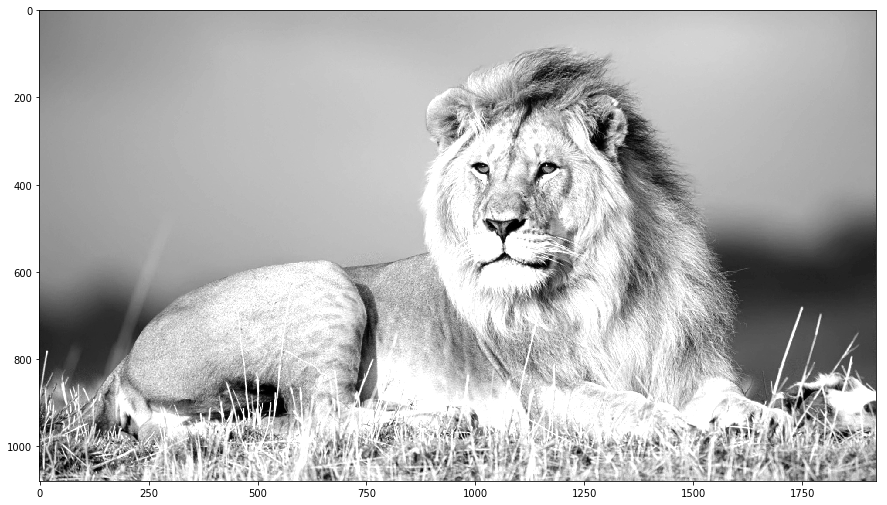

In [31]:

#Task 1a
def intensity(a,image):
    image=image.astype(int)
    image=image*a
    image[image>255]=255
    image[image<0]=0
    image=image.astype(int)
    
    return image
#Task1 b
def negative(image):
    
    return 255-image


im=cv2.imread("image.jpg",0)
plt.imshow(intensity(1.4,im),cmap='gray')
plt.show()


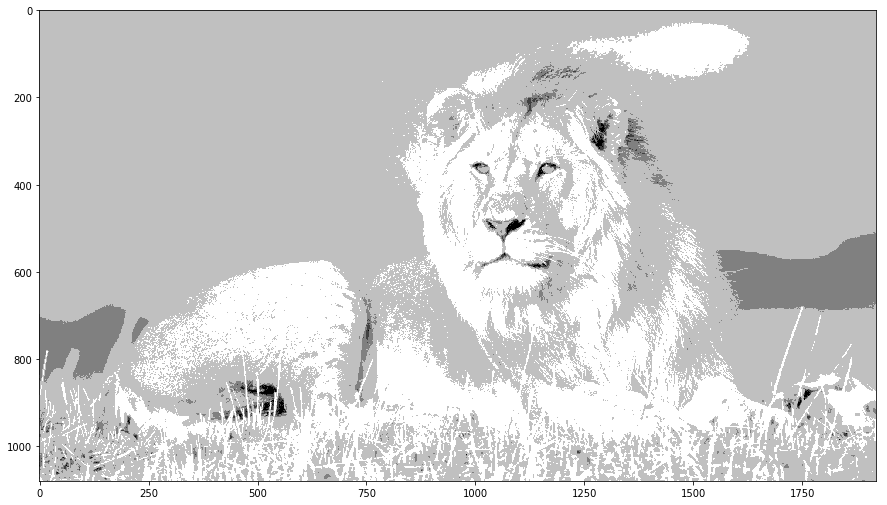

[[161 161 161 ..., 217 217 217]
 [163 161 161 ..., 217 217 217]
 [163 161 161 ..., 217 217 217]
 ..., 
 [240  49  99 ..., 161 165 169]
 [234  33  84 ..., 169 169 169]
 [236  23  68 ..., 179 173 167]]


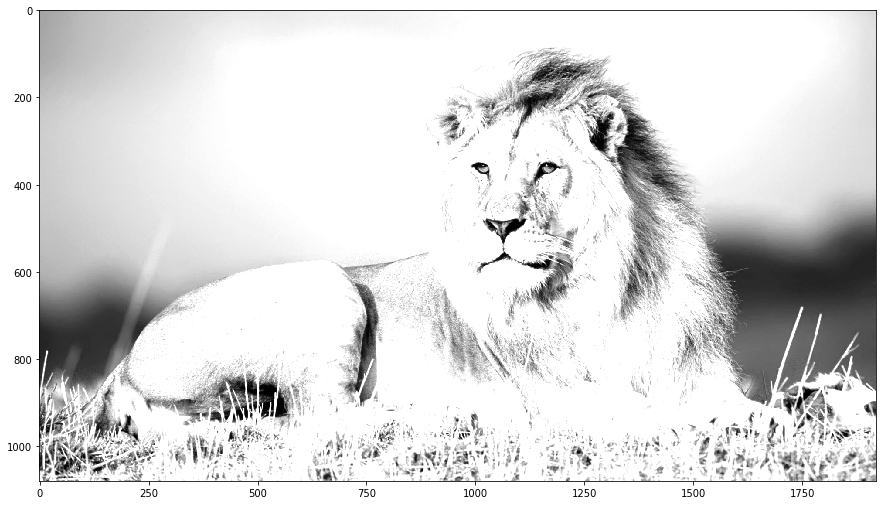

In [247]:
#Task 2 Log functions:

def log_transform(image,c):
    image=image.astype(int)
    image=np.log(1+image)
    image=c*image
    
    image[image>255]=255
    image[image<0]=0
    return image.astype("uint8")
im=cv2.imread("image.jpg",0)
plt.imshow(log_transform(im,0.8),cmap="gray")
plt.show()
def power_transform(image,power,c):
    image=image.astype(int)
    image=np.power(image,power)
    image=c*image 
    image[image>255]=255
    image[image<0]=0
    return image.astype('uint8')

plt.imshow(power_transform(im,1.13,1),cmap="gray")
plt.show()

(2073600,)


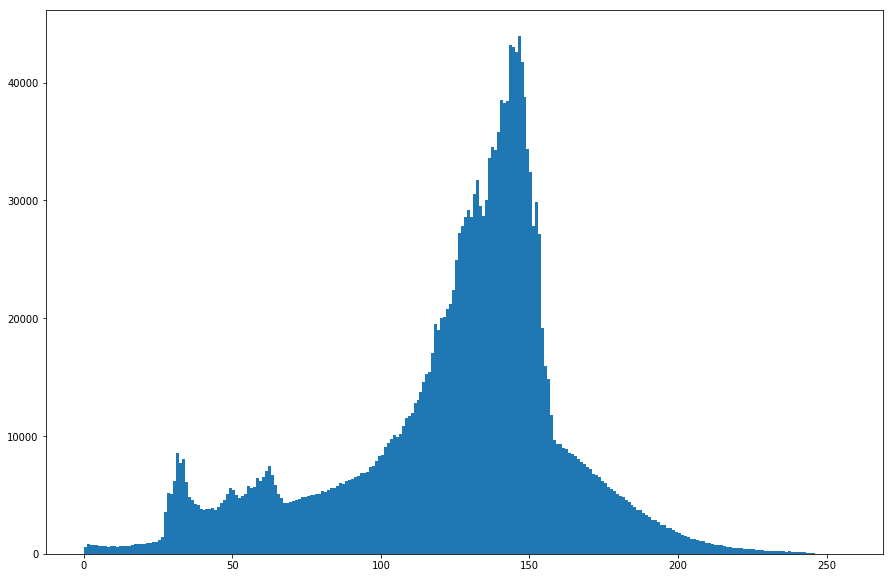

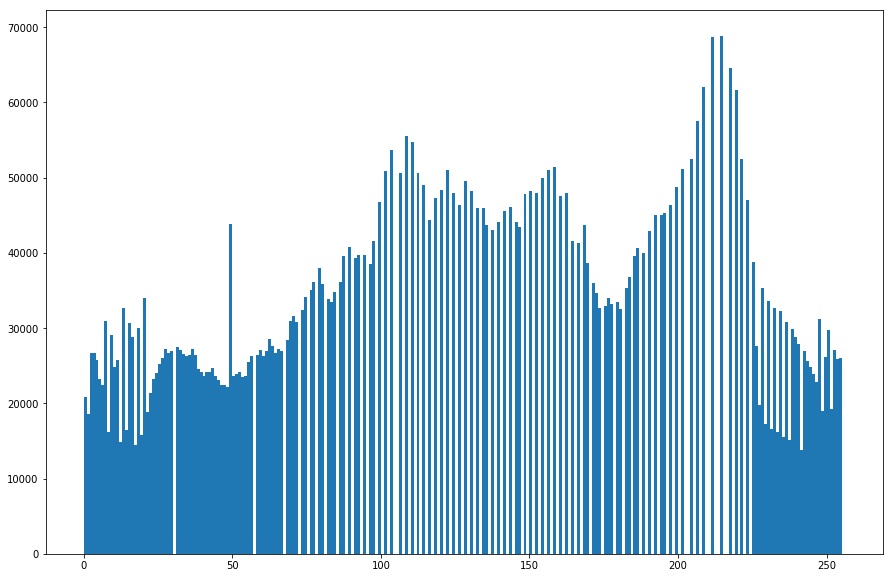

In [11]:

#histogram equilization
import collections


plt.rcParams['figure.figsize'] = (15.0, 10.0)
image=cv2.imread("image.jpg")
image=np.average(image,2).astype(int)
print image.ravel().shape


#plt.imshow(imagee,cmap = plt.get_cmap('gray'))
plt.hist(image.ravel(),256,[0,256])
plt.show()

def his_equi(image):
   
    flat=image.flatten()
    bins= collections.Counter(flat)
    total=sum(bins.values())

    cdf=np.array(bins.values()).astype(float)
    cdf=(cdf)/total

    for i in range (1,len(bins)):
        cdf[i]=cdf[i-1]+cdf[i]

    cdf=np.array(cdf)
    cdf=(cdf*255).astype(int)


    dic ={}
    i=0
    for key in bins.keys():
        dic[key]=cdf[i]
        i+=1

    equalized=np.zeros_like(flat)

    for key in bins.keys():
        equalized=np.where(flat==key,dic[key],equalized)


    return equilized
    """plt.hist(equalized,256,[0,256])
    plt.show()"""
his_equi(cv2.imread("image.jpg"))

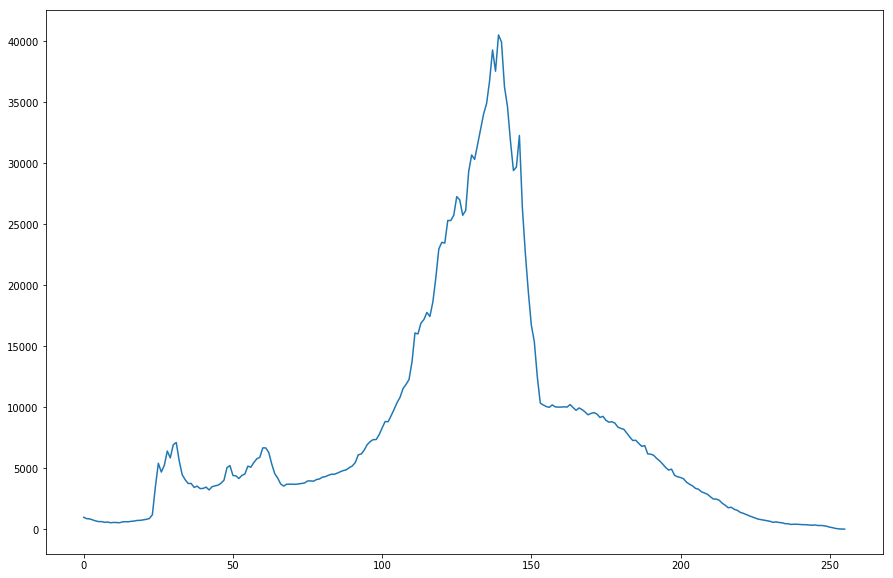

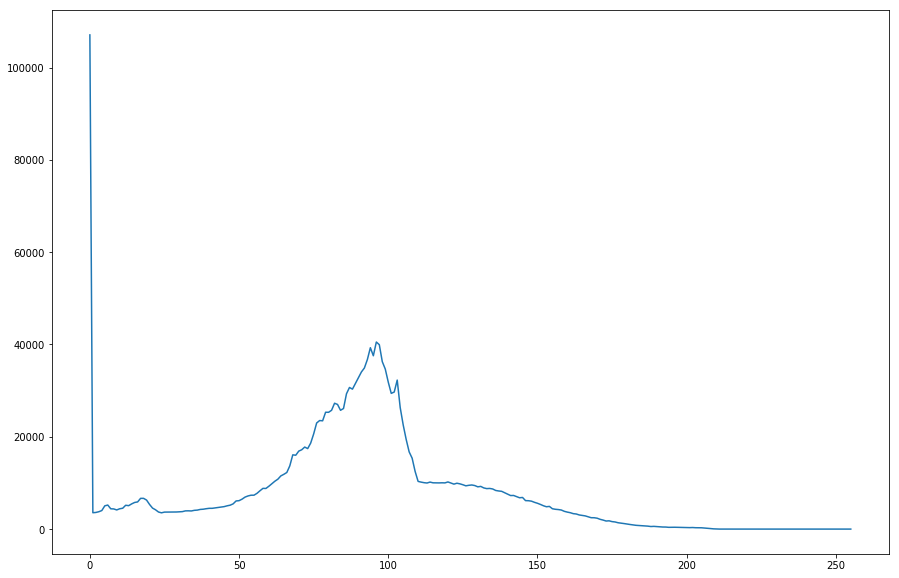

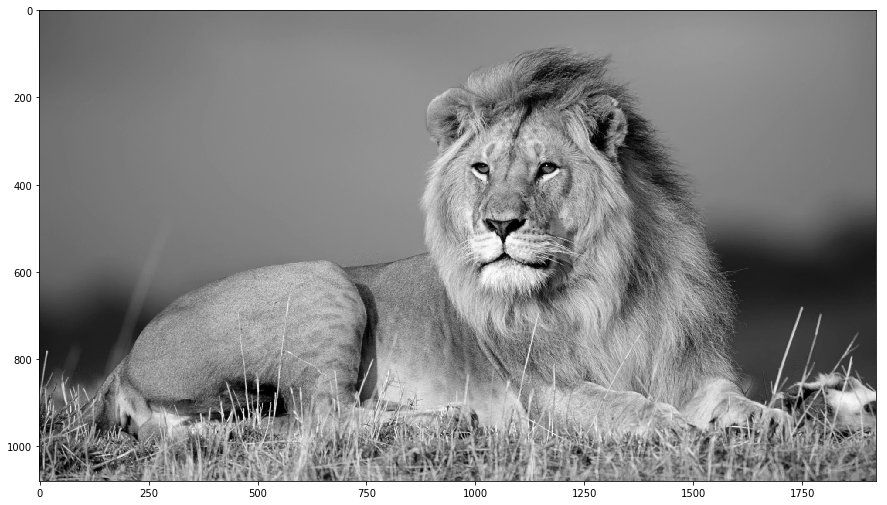

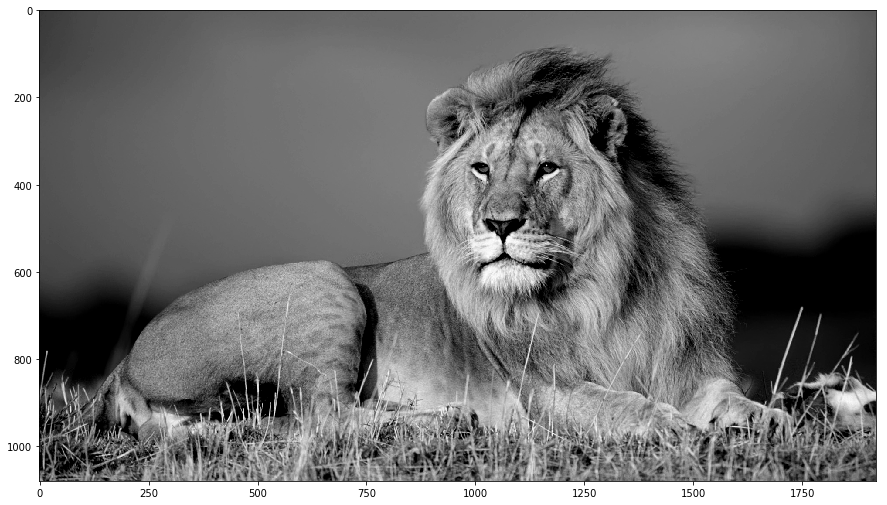

In [217]:
#Task 4


def contrast_stretching(image,clip):
    clip_right=clip
    clip_left=100-clip
   
    hist=cv2.calcHist([image],[0],None,[256],[0,256])
 
    x=np.arange(256)
    tem=np.zeros_like(hist)
    tem[0]=0
    plt.plot(x,hist)
    plt.show()
    total=np.sum(hist)
    for i in range(1,len(hist)):
        tem[i]=(np.sum(hist[0:i])/total)*100
    c = (np.abs(tem-clip_right)).argmin()
    d = (np.abs(tem-clip_left)).argmin()
     
    image=image.astype(int)  
    out=((image-c)*((a)/((d-c))))
    out[out<0]=0
    out[out>255]=255
    out=out.astype("uint8")
    his=cv2.calcHist([out],[0],None,[256],[0,256])
    x=np.arange(256)

    plt.plot(x,his)
    plt.show()

    plt.imshow(image,cmap="gray")
    plt.show()
    plt.imshow(out,cmap="gray")
    plt.show()
    
    
    
image=cv2.imread("image.jpg",0)
contrast_stretching( image,5)

In [216]:
"""Task 4b : No its not advisible to do contrast stretching by just clipping one side of histogram because in
that case histogram will be pushed to extreme gray or extreme white, which might be usable but not what is expected 
contrast stretching
"""

'Task 4b : No its not advisible to do contrast stretching by just clipping one side of histogram because in\nthat case histogram will be pushed to extreme gray or extreme white, which might be usable but not what is expected \ncontrast stretching\n'